## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0'

In [3]:
import keras
from keras.datasets import fashion_mnist
import pandas as pd
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
os.listdir('.')

['.config', 'drive', 'sample_data']

In [6]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
print("Training data X-- Shape :", x_train.shape,"and Data Type : ", x_train.dtype)
print("Testing data X-- Shape :", x_test.shape,"and Data Type : ", x_test.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)

Training data X-- Shape : (60000, 28, 28) and Data Type :  uint8
Testing data X-- Shape : (10000, 28, 28) and Data Type :  uint8
Training data y-- Shape : (60000,) and Data Type :  uint8
Testing data y-- Shape : (10000,) and Data Type :  uint8


### Find no.of samples are there in training and test datasets

In [8]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
print(y_train.shape)

(60000,)


In [10]:
print(x_test.shape)

(10000, 28, 28)


In [11]:
print(y_test.shape)

(10000,)


Find dimensions of an image in the dataset

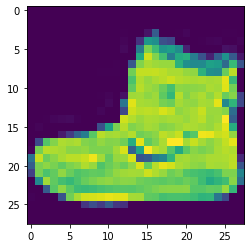

In [12]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])


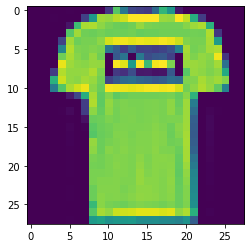

In [13]:
import matplotlib.pyplot as plt
img1 = plt.imshow(x_train[1])


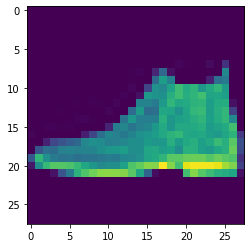

In [14]:
import matplotlib.pyplot as plt
img2 = plt.imshow(x_test[0])

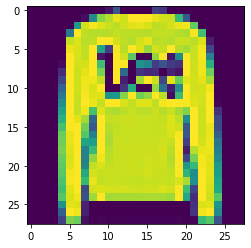

In [15]:
import matplotlib.pyplot as plt
img2 = plt.imshow(x_test[1])

In [17]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [0]:
height = x_train.shape[0]
width = x_train.shape[1]
channels = x_train.shape[2]

In [22]:
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Height       :  60000
Image Width        :  28
Number of Channels :  28


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [23]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]



array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


### Normalize both the train and test image data from 0-255 to 0-1

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
import cv2


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [28]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


### Import the necessary layers from keras to build the model

In [0]:

from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers.convolutional import Convolution2D,MaxPooling2D


In [0]:
#!pip install tf-nightly



### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [30]:
# Define model
model = Sequential()
# 1st Conv Layer

model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))


In [31]:
 # 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]



In [33]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 23s 388us/step - loss: 0.3702 - acc: 0.8683 - val_loss: 0.2983 - val_acc: 0.8908
Epoch 2/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.2291 - acc: 0.9158 - val_loss: 0.2521 - val_acc: 0.9086
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.1679 - acc: 0.9373 - val_loss: 0.2454 - val_acc: 0.9128
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.1156 - acc: 0.9570 - val_loss: 0.2593 - val_acc: 0.9147
Epoch 5/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0763 - acc: 0.9721 - val_loss: 0.3419 - val_acc: 0.9155
Epoch 6/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0522 - acc: 0.9807 - val_loss: 0.3588 - val_acc: 0.9097
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0365 - acc: 0.9867 - val_loss: 

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [35]:
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

#Add a MaxPooling Layer of size 2X2 
model2.add(MaxPooling2D(pool_size=(2,2), name='max_1'))
    
#Apply Dropout with 0.25 probability 
model2.add(Dropout(0.25,name='drop_1'))

#Flatten the layer

model2.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'

model2.add(Dense(128, activation='relu',name='dense_1'))
    
# More Dropout - Apply Dropout with 0.5 probability 

model2.add(Dropout(0.5,name='drop_2'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS,
           validation_data=(x_test, y_test), callbacks=callback_list)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.4872 - acc: 0.8280 - val_loss: 0.3141 - val_acc: 0.8862
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3271 - acc: 0.8813 - val_loss: 0.2740 - val_acc: 0.8994
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2844 - acc: 0.8983 - val_loss: 0.2530 - val_acc: 0.9094
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2559 - acc: 0.9065 - val_loss: 0.2470 - val_acc: 0.9130
Epoch 5/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.2357 - acc: 0.9139 - val_loss: 0.2384 - val_acc: 0.9152
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2217 - acc: 0.9184 - val_loss: 0.2384 - val_acc: 0.9152
Epoch 7/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2060 - acc: 0.9223 - val_loss: 0.2174 - 

In [36]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

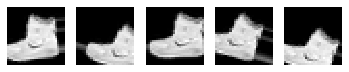

In [38]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [39]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  18/1875 [..............................] - ETA: 18s - loss: 2.8641 - acc: 0.2118

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 20s 11ms/step - loss: 1.1868 - acc: 0.5599 - val_loss: 0.4931 - val_acc: 0.8286
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9041 - acc: 0.6633 - val_loss: 0.5049 - val_acc: 0.8143
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.8297 - acc: 0.6907 - val_loss: 0.4792 - val_acc: 0.8217
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7845 - acc: 0.7071 - val_loss: 0.4623 - val_acc: 0.8354
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7524 - acc: 0.7208 - val_loss: 0.4873 - val_acc: 0.8259
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7244 - acc: 0.7330 - val_loss: 0.4991 - val_acc: 0.8134
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.7091 - acc: 0.7389 - val_loss: 0.4943 - val_acc: 0.8278
Epoch 8/10
1875/1875 [==============================] - 19s

In [40]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

###  Report the final train and validation accuracy

model accuracy : 0.925


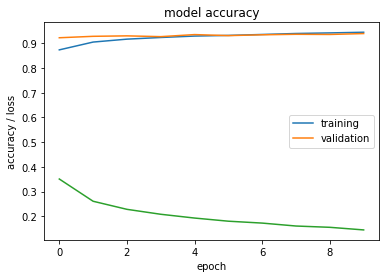

In [41]:
import numpy as np

batch_size=32
epochs = 10
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose= False )
loss,accuracy  = model2.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [42]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 49us/step
[0.08939708229104677, 0.9691166666666666]


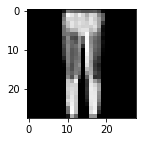

1


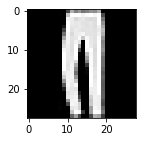

1


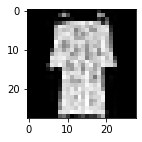

3


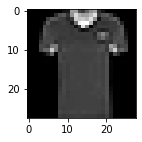

0


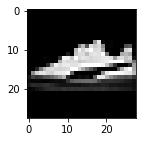

7


In [44]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[36].reshape(1,28,28,1))))

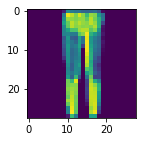

1


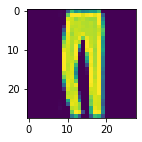

1


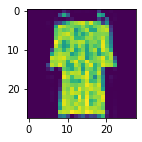

3


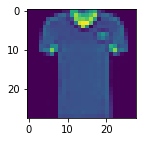

0


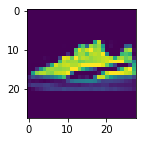

7


In [45]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28))
plt.show()
print(np.argmax(model2.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28))
plt.show()
print(np.argmax(model2.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28))
plt.show()
print(np.argmax(model2.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28))
plt.show()
print(np.argmax(model2.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28))
plt.show()
print(np.argmax(model2.predict(x_test[36].reshape(1,28,28,1))))

In [46]:
Train = model2.evaluate(x_train, y_train)
print(Train)

60000/60000 [==============================] - 3s 51us/step
[0.08939708229104677, 0.9691166666666666]


In [47]:
Validation = model2.evaluate(x_test, y_test)
print(Validation)

10000/10000 [==============================] - 1s 51us/step
[0.23692839502990246, 0.925]


In [48]:
results_test = pd.DataFrame({'DataSet':['Test'], 'accuracy': Validation[1]},index={'1'})
results_train= pd.DataFrame({'DataSet':['Train'], 'accuracy': [Train[1]]},index={'2'})
results= pd.concat([results_test, results_train])
results= results[['DataSet', 'accuracy']]
results

DataSet  accuracy
1    Test  0.925000
2   Train  0.969117

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [50]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [51]:
print("Training data X-- Shape :", x_train.shape,"and Data Type : ", x_train.dtype)
print("Testing data X-- Shape :", x_test.shape,"and Data Type : ", x_test.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)

Training data X-- Shape : (50000, 32, 32, 3) and Data Type :  uint8
Testing data X-- Shape : (10000, 32, 32, 3) and Data Type :  uint8
Training data y-- Shape : (50000, 1) and Data Type :  uint8
Testing data y-- Shape : (10000, 1) and Data Type :  int64


In [52]:
height = x_train.shape[0]
width = x_train.shape[1]
channels = x_train.shape[2]

print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Height       :  50000
Image Width        :  32
Number of Channels :  32


In [53]:
%matplotlib inline

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('--- DATA INFORMATION---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- DATA INFORMATION---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

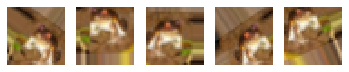

In [56]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

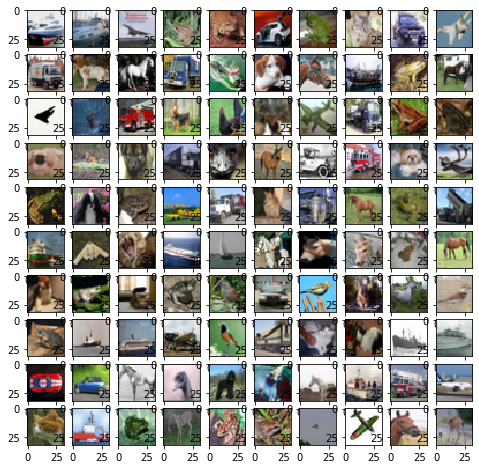

In [78]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=x_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()